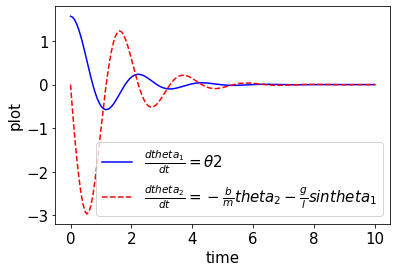

MovieWriter imagemagick unavailable; using Pillow instead.


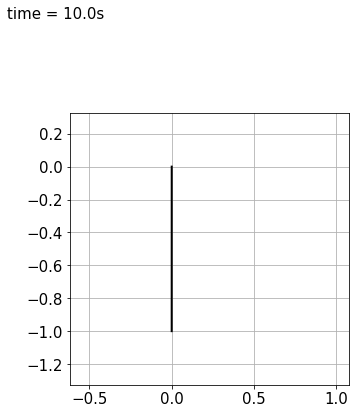

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def model (theta,t,b,g,l,m):
    theta1 = theta[0]
    theta2 = theta[1]
    dtheta1_dt = theta2
    dtheta2_dt = -(b/m)*theta2-(g/l)*math.sin(theta1)
    dtheta_dt = [dtheta1_dt,dtheta2_dt]
    return dtheta_dt

b=0.25
g=9.81
l=1
m=0.15

# Initial Condition
theta_0 = [math.pi/2,0]

# Time Points
t = np.linspace(0,10,150)

from fractions import Fraction 
# Solving The ODE
theta = odeint(model,theta_0,t,args=(b,g,l,m))

plt.plot(t,theta[:,0],'b-',label=r'$\frac{dtheta_1}{dt}=\theta2$')
plt.plot(t,theta[:,1],'r--',label=r'$\frac{dtheta_2}{dt}=-\frac{b}{m}theta_2-\frac{g}{l}sintheta_1$')
plt.xlabel('time')
plt.ylabel('plot')
plt.legend(loc='best')
plt.show()

import matplotlib.animation as animation
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(theta)):
    ln, = ax.plot([0, np.sin(theta[i, 0])], [0, -np.cos(theta[i, 0])],
                  color='k', lw=2)
    tm = ax.text(-1, 0.9, 'time = %.1fs' % t[i])
    lns.append([ln, tm])
ax.set_aspect('equal', 'datalim')
ax.grid()
ani = animation.ArtistAnimation(fig, lns, interval=50)
    
fn = 'odeint_single_pendulum_artistanimation'
ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

plt.rcParams['animation.html'] = 'html5'
ani